In [1]:
from sklearn import mixture
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:

def plot_results(X, Y_, means, covariances, index, title, plot_gmm = True):
    plt.figure(figsize=(15,25))
    splot = plt.subplot(3, 1, 1 + index)
    color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
    if plot_gmm:
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
#             print(Y_)
            if not np.any(Y_ == i):
                continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    else:
        plt.scatter(X[:, 0], X[:, 1], 0.8, color="c")
        

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

### Comparing GMM vs Dirichlet Process on cluster of data

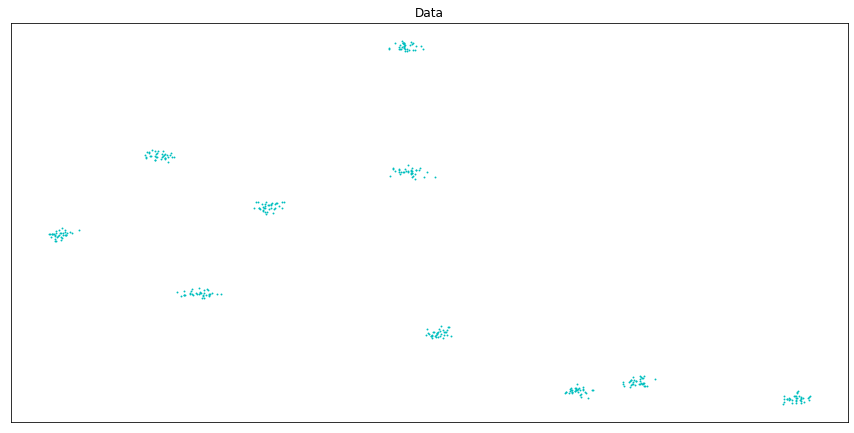

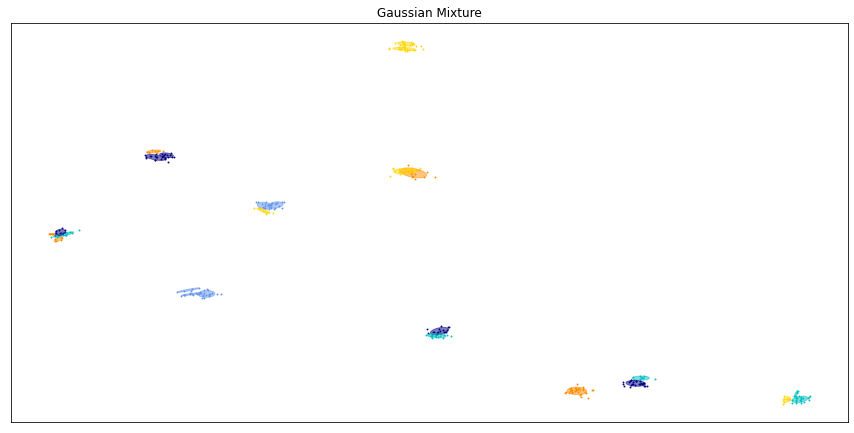

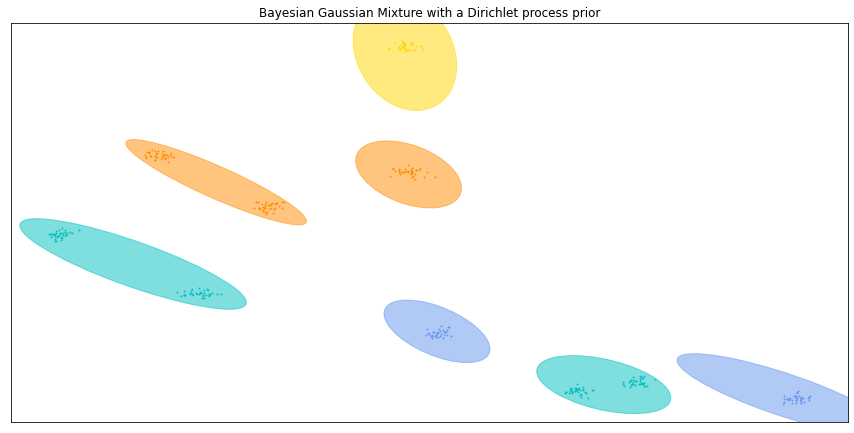

In [3]:
from sklearn.datasets import make_blobs

X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)

plot_results(
    X_temp,
    None,
    None,
    None,
    1,
    "Data",
    False
)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(X_temp, gmm.predict(X_temp), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# plt.show()
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(
    X_temp,
    dpgmm.predict(X_temp),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Comparing GMM vs Dirichlet Process for random Data

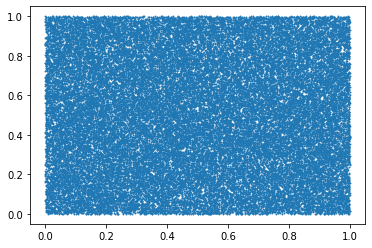

In [4]:
X_tmp = np.random.rand(50000, 2)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
# print(X_tmp.shape, y_tmp.shape)

##### Comment the following if you want to run on uniform data. Comment the top cell if you want to run on normal data

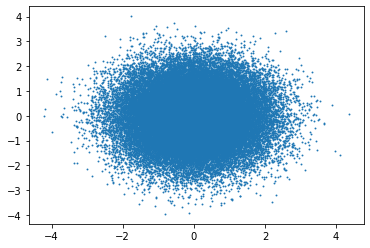

In [5]:
X_tmp = np.random.normal(size = (50000, 2))
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
plt.show()

In [6]:
bay_gmm = mixture.BayesianGaussianMixture(n_components=100, n_init=5, verbose = 2, random_state = 1)
bay_gmm.fit(X_tmp)

Initialization 0
  Iteration 10	 time lapse 8.23958s	 ll change 148.55686
  Iteration 20	 time lapse 2.80226s	 ll change 54.05587
  Iteration 30	 time lapse 2.88299s	 ll change 28.70232
  Iteration 40	 time lapse 2.90212s	 ll change 18.11282
  Iteration 50	 time lapse 2.80731s	 ll change 12.95490
  Iteration 60	 time lapse 2.92553s	 ll change 10.30107
  Iteration 70	 time lapse 2.82024s	 ll change 8.83932
  Iteration 80	 time lapse 2.86214s	 ll change 7.33414
  Iteration 90	 time lapse 2.80515s	 ll change 4.91219
  Iteration 100	 time lapse 2.92028s	 ll change 4.39104
Initialization converged: False	 time lapse 33.96767s	 ll -52085.66920
Initialization 1
  Iteration 10	 time lapse 7.73252s	 ll change 143.95788
  Iteration 20	 time lapse 2.81006s	 ll change 54.10228
  Iteration 30	 time lapse 2.76639s	 ll change 28.26966
  Iteration 40	 time lapse 2.86240s	 ll change 18.06875
  Iteration 50	 time lapse 2.70243s	 ll change 12.97628
  Iteration 60	 time lapse 2.81288s	 ll change 9.54564
 

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=100, n_init=5, random_state=1, verbose=2)

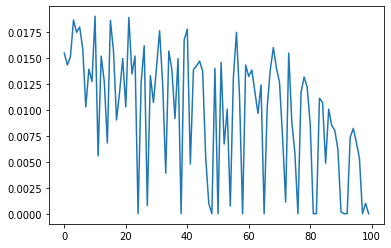

In [7]:
plt.plot(bay_gmm.weights_)

Initialization 0
Initialization converged: True	 time lapse 7.66926s	 ll -2.84013
Initialization 1
Initialization converged: True	 time lapse 6.83027s	 ll -2.84027
Initialization 2
Initialization converged: True	 time lapse 7.34503s	 ll -2.84043
Initialization 3
Initialization converged: True	 time lapse 7.81299s	 ll -2.84073
Initialization 4
Initialization converged: True	 time lapse 9.22347s	 ll -2.84033


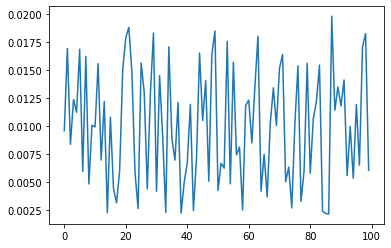

In [8]:
tmp_gmm = mixture.GaussianMixture(n_components=100, random_state=1, verbose = 2, n_init = 5).fit(X_tmp)
plt.plot(tmp_gmm.weights_)

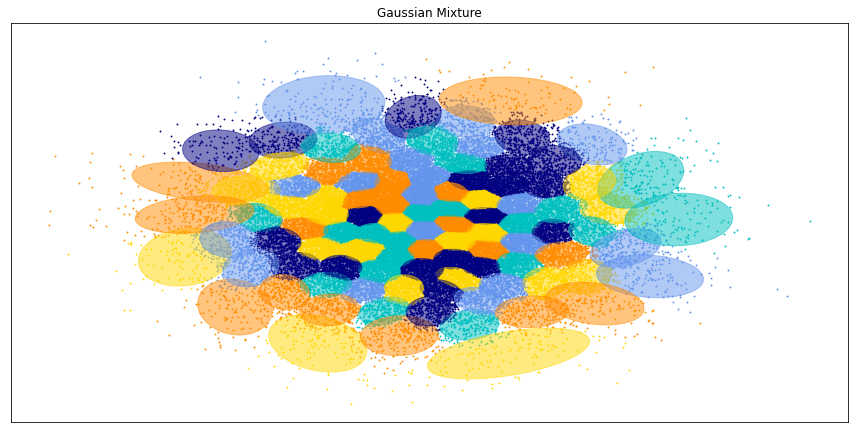

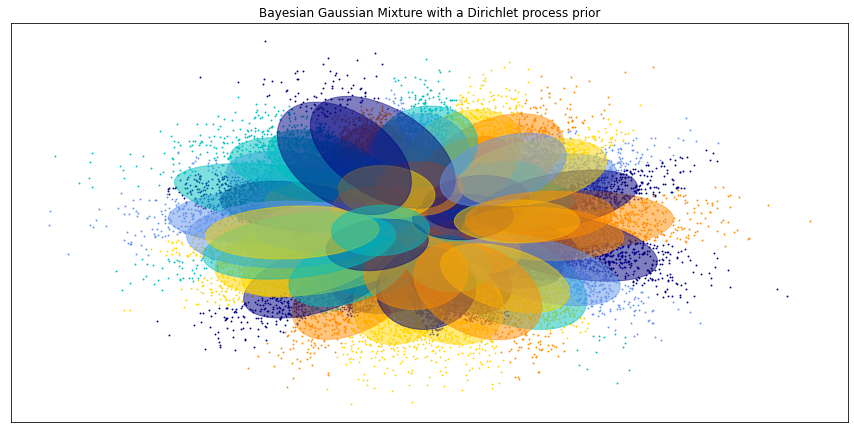

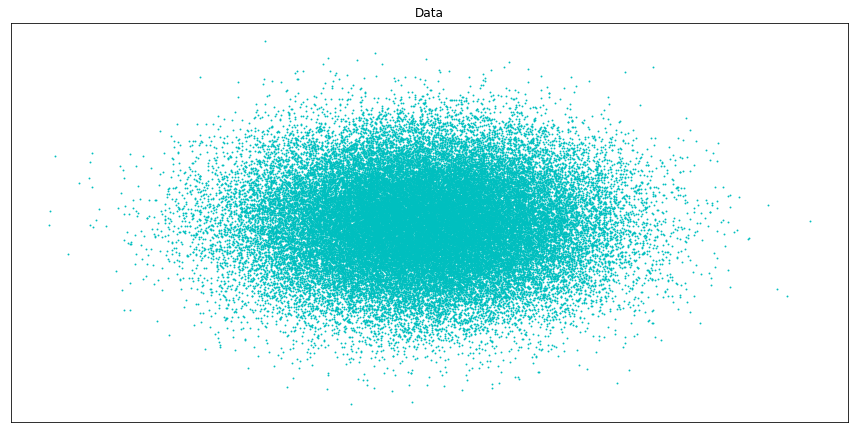

In [9]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

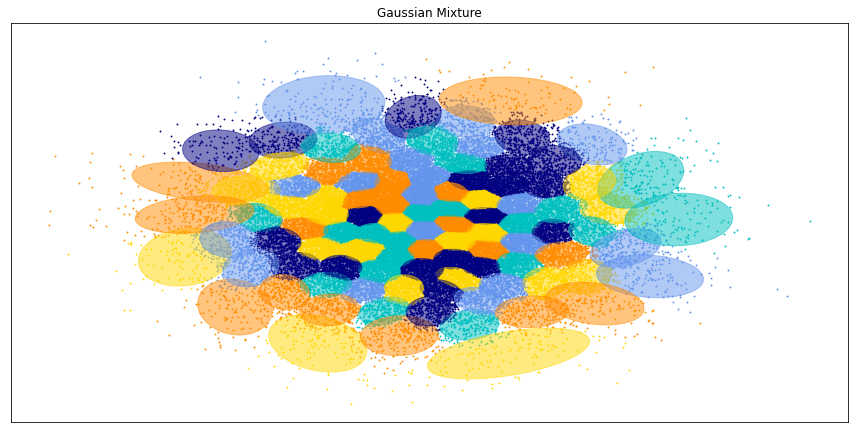

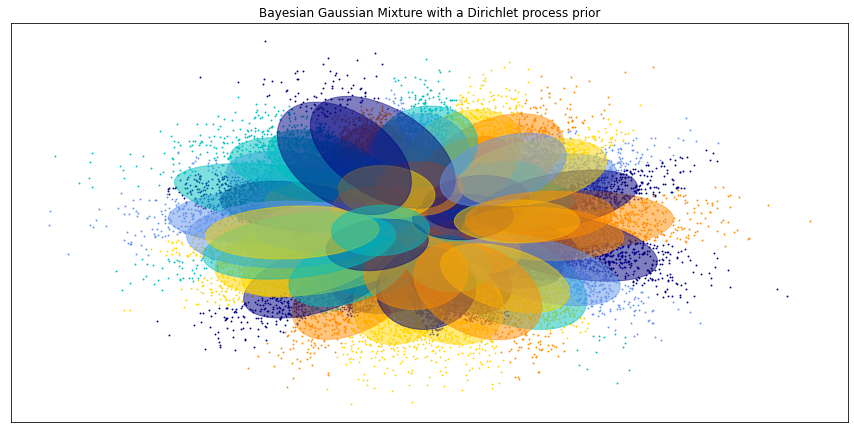

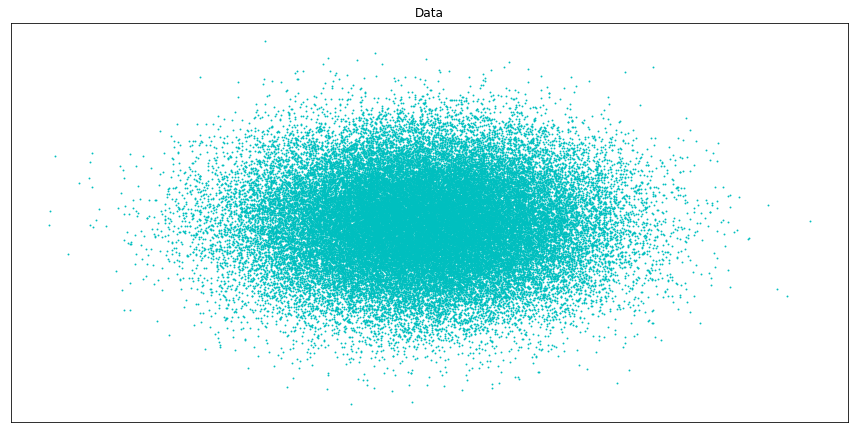

In [10]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

## GMM on Generated Data

In [3]:
X = np.zeros((0, 7))
filenames = []

num_components = 0
paths = []
foldername = "/root/catkin_ws/trajectory_data/"
env_names = sorted(glob.glob(foldername + "env*"))
filenames = []
for env_name in env_names:
    filenames.extend(sorted(glob.glob("%s/*.p"%env_name)))
filenames

['/root/catkin_ws/trajectory_data/env_000000/path_0.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_1.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_10.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_11.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_12.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_13.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_14.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_15.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_16.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_17.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_18.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_19.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_2.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_3.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_4.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_5.p',
 '/root/catkin_ws/trajectory_data/env_000000/path_6.p',
 '/root/catkin_ws/trajectory_data/env_

In [4]:
# Create paths from trajectory data
for idx, filename in enumerate(filenames[::1]):
    if idx > 0 and idx%500 == 0:
        print(idx)
    with open(filename, "rb") as f:
        path = pickle.load(f, encoding="latin1")['path']
#         path = pickle.load(f)['path']
        paths.append(path)
        path_len = path.shape[0]
        if path_len > num_components:
            num_components = path_len
        X = np.append(X, path, axis=0)


500
1000
1500
2000
2500


### GMM on dataset

In [5]:
gmm = mixture.GaussianMixture(n_components=num_components * 10, random_state=0, n_init = 5, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 495.33826s	 ll change 0.57691
  Iteration 20	 time lapse 391.72386s	 ll change 0.22900
  Iteration 30	 time lapse 385.35448s	 ll change 0.06193
  Iteration 40	 time lapse 381.55294s	 ll change 0.03259
  Iteration 50	 time lapse 373.44732s	 ll change 0.00995
  Iteration 60	 time lapse 379.56376s	 ll change 0.00121
Initialization converged: True	 time lapse 2701.78584s	 ll 9.19105
Initialization 1
  Iteration 10	 time lapse 488.32836s	 ll change 0.60197
  Iteration 20	 time lapse 404.89146s	 ll change 0.20335
  Iteration 30	 time lapse 399.67670s	 ll change 0.06267
  Iteration 40	 time lapse 393.44244s	 ll change 0.02997
  Iteration 50	 time lapse 386.50693s	 ll change 0.01233
  Iteration 60	 time lapse 371.48588s	 ll change 0.00508
  Iteration 70	 time lapse 378.26125s	 ll change 0.00170
Initialization converged: True	 time lapse 3004.72335s	 ll 9.16442
Initialization 2
  Iteration 10	 time lapse 491.74935s	 ll change 0.58948
  Iteration 20	 t

In [ ]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path[:, :2])
    if idx%100 == 0:
        print(predicted_distributions)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])


In [ ]:
gmm_name = 'gmm

In [6]:
gmm_name = 'gmm_collision/'

import os
if not os.path.exists(gmm_name):
    os.makedirs(gmm_name)

np.save(gmm_name + 'weights', gmm.weights_, allow_pickle=False)
np.save(gmm_name + 'means', gmm.means_, allow_pickle=False)
np.save(gmm_name + 'covariances', gmm.covariances_, allow_pickle=False)



### Dirichlet Process on data

In [7]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 10, random_state=1, verbose=2, n_init = 5).fit(X)

Initialization 0
  Iteration 10	 time lapse 486.03472s	 ll change 6417.54843
  Iteration 20	 time lapse 426.01678s	 ll change 2836.57073
  Iteration 30	 time lapse 405.54392s	 ll change 1482.47105
  Iteration 40	 time lapse 406.13277s	 ll change 1193.87886
  Iteration 50	 time lapse 407.44286s	 ll change 712.65644
  Iteration 60	 time lapse 405.57567s	 ll change 494.89562
  Iteration 70	 time lapse 405.78710s	 ll change 360.31836
  Iteration 80	 time lapse 405.82346s	 ll change 439.38676
  Iteration 90	 time lapse 405.28628s	 ll change 187.79024
  Iteration 100	 time lapse 405.65933s	 ll change 127.84244
Initialization converged: False	 time lapse 4159.30312s	 ll -502343.43977
Initialization 1
  Iteration 10	 time lapse 491.52293s	 ll change 6598.93597
  Iteration 20	 time lapse 404.74948s	 ll change 2685.27798
  Iteration 30	 time lapse 403.54607s	 ll change 1656.22647
  Iteration 40	 time lapse 405.11649s	 ll change 916.99397
  Iteration 50	 time lapse 405.25707s	 ll change 746.14871

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [8]:
dpgmm_name = 'dpgmm_collision/'

import os
if not os.path.exists(dpgmm_name):
    os.makedirs(dpgmm_name)

np.save(dpgmm_name + 'weights', dpgmm.weights_, allow_pickle=False)
np.save(dpgmm_name + 'means', dpgmm.means_, allow_pickle=False)
np.save(dpgmm_name + 'covariances', dpgmm.covariances_, allow_pickle=False)

In [9]:
gmm_predicted = gmm.predict(X)
dpgmm_predicted = dpgmm.predict(X)


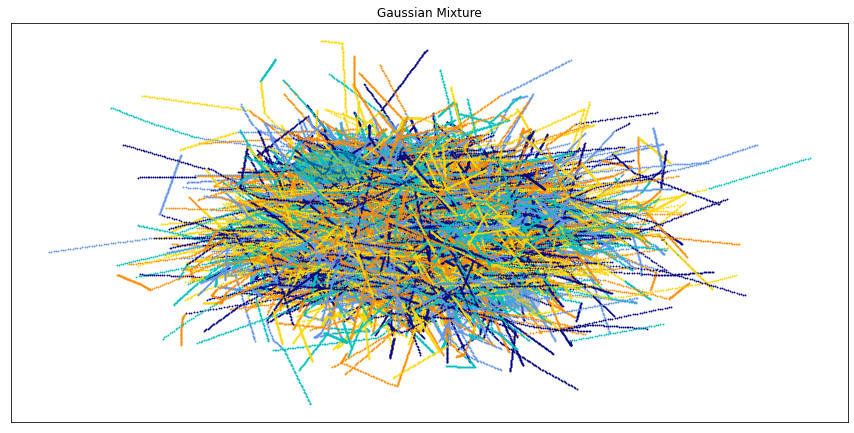

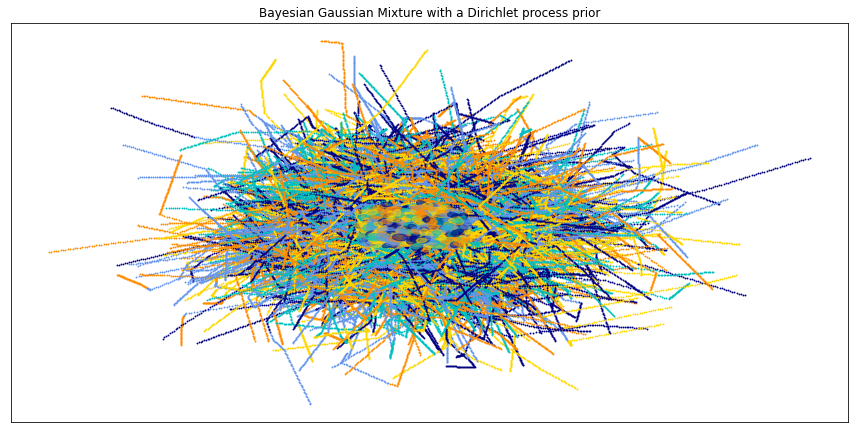

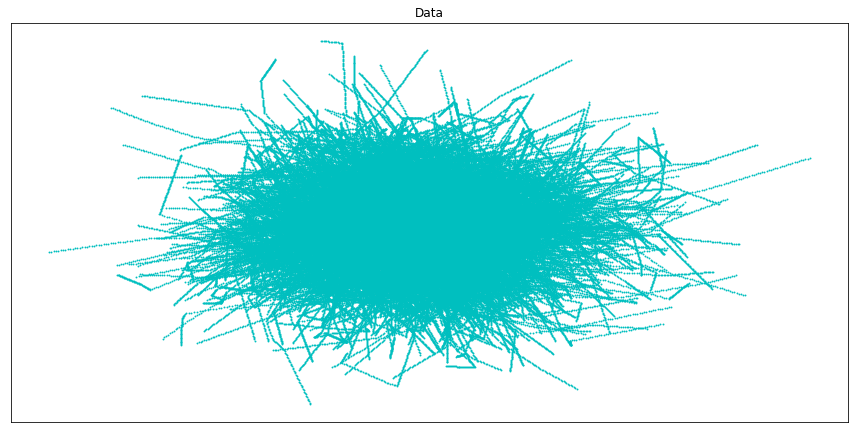

In [10]:
X_pca = PCA(n_components=2).fit_transform(X)
plot_results(X_pca, gmm_predicted, PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # Fit a Dirichlet process Gaussian mixture using five components
plot_results(
    X_pca,
    dpgmm_predicted,
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# # plt.show()
# # plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Data",
    False
)
plt.show()

## Code to create graph from GMM

In [12]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = dpgmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("dpgmm_collision/edges.npy", unique)
np.save("dpgmm_collision/edge_probabilities.npy", probabilities)

In [13]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("gmm_collision/edges.npy", unique)
np.save("gmm_collision/edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
